In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [3]:
imagePaths = getListOfFiles("./coba/") ## Folder structure: datasets --> sub-folders with labels name
# print(imagePaths)

In [4]:
data = []
lables = []
c = 0 ## to see the progress

In [5]:
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)

    img = cv2.imread(image)
    img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
    data.append(img)
    c=c+1
    print(c)

# print(lables)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [6]:
data = np.array(data)
lables = np.array(lables)

In [7]:
le = LabelEncoder()
lables = le.fit_transform(lables)

In [8]:
myset = set(lables)
print(myset)

{0, 1}


In [9]:
dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)

In [10]:
print(data.shape)

(200, 30000)


In [11]:
print(lables.shape)

(200,)


In [12]:
print(dataset_size)

200


In [13]:
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25, random_state=42)

In [14]:
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(trainX, trainY)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [15]:
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

              precision    recall  f1-score   support

         Cat       0.55      0.59      0.57        27
         Dog       0.48      0.43      0.45        23

    accuracy                           0.52        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.52      0.52      0.52        50



In [16]:
model.predict(testX)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0], dtype=int64)

In [18]:
def predict_images(model, le, test_images):
    # Predict labels for test images
    predicted_labels = model.predict(test_images)

    # Convert numeric labels back to original class labels
    predicted_labels = le.inverse_transform(predicted_labels)

    return predicted_labels

In [19]:
# Predict labels for test images and display them
# test_predictions = predict_images(model, le, testX)
# for i in range(len(test_predictions)):
#     predicted_label = test_predictions[i]
#     true_label = le.classes_[testY[i]]

    # Reshape the image to its original dimensions
    # img = testX[i].reshape(100, 100, 3)

    # Display the image
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    # plt.axis('off')
    # plt.show()

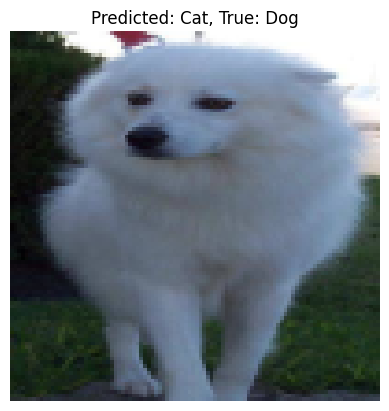

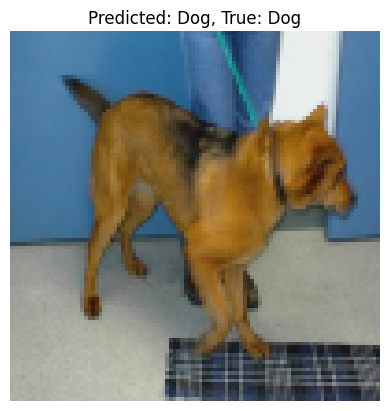

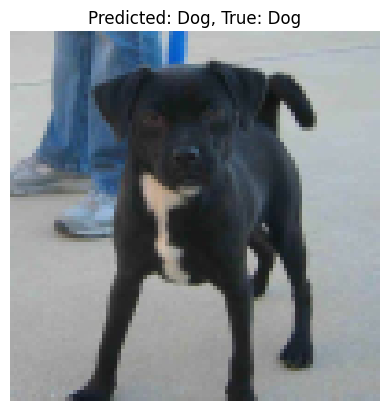

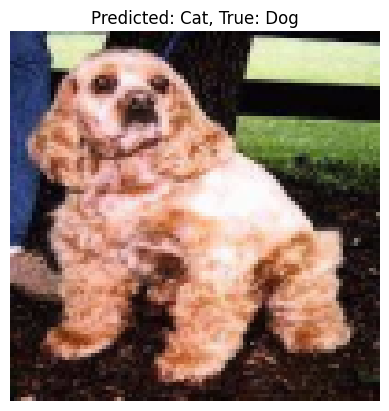

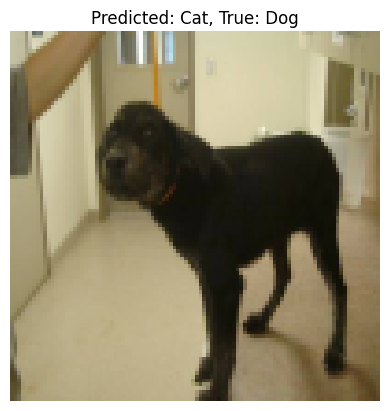

In [20]:
# Predict labels for random test images and display them
num_display_images = 5  # Change this value to the number of images you want to display
test_predictions = predict_images(model, le, testX)

for _ in range(num_display_images):
    # Randomly select an index from the test set
    random_index = random.randint(0, len(testX) - 1)

    predicted_label = test_predictions[random_index]
    true_label = le.classes_[testY[random_index]]

    # Reshape the image to its original dimensions
    img = testX[random_index].reshape(100, 100, 3)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()